<h1>
    <font color=teal>
        <b>
            2nd Checkpoint :
        </b>
    </font>
</h1>
<h4>
    <font color=white>
        By : Khaled Chaabouni
    </font>
</h4>

<h2>
    <font color=darkorange>
            Declarations :
    </font>
</h2>

<h3>
    <font color=darkgreen>
            Importing Libraries :
    </font>
</h3>

In [1129]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

<h3>
    <font color=darkgreen>
            Variables :
    </font>
</h3>

In [1130]:
Alphabet={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
Names=[]
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady":"Royalty","the Countess":"Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss":"Miss","Ms":"Mrs","Mr":"Mrs","Mrs":"Mrs","Master":"Master"}

<h2>
    <font color=darkorange>
            Gathering Data :
    </font>
</h2>

In [1131]:
#Importing Data from Titanic.csv file :
DataFile=pd.read_csv("C:/Users/ASUS/Desktop/Coding Section/JupyterSpace/Data/Titanic.csv",encoding="ISO-8859-1")
Data=pd.DataFrame(DataFile)
#Printing Data's Head() :
print(Data.head())
#Printing Data's Body() :
Data.info()
#Printing Data :
Data

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


<h2>
    <font color=darkorange>
            Data Preprocessing :
    </font>
</h2>

In [1132]:
#Cleaning useful Data :
Data["survived"].fillna(0,inplace=True)
Data["age"].fillna(0,inplace=True)
Data["boat"].fillna(0,inplace=True)
Data["name"].dropna()
#As Characters in Data["boat"] are considered as >=1boat and therefore, have survivors, We needed them as numerical values :
for i in range(0,len(Data)):
    if Data["boat"][i] in Alphabet:
        Data.replace(Data["boat"][i],Alphabet[Data["boat"][i]],inplace=True)
    else:
        if type(Data["boat"][i])!=str:
            Data.replace(Data["boat"][i],float(Data["boat"][i]),inplace=True)
        else:
            if (len(Data["boat"][i])==1) and (type(Data["boat"][i])==str) and (Data["boat"][i]!=np.NaN):
                Data.replace(Data["boat"][i],float(Data["boat"][i]),inplace=True)
#linear scan to convert all 2 dimentional str like '5 2' into float64:
for i in range(0,len(Data["boat"])):
    if type(Data["boat"][i])==str and len(Data["boat"][i])>2:
        Data.replace(Data["boat"][i],float(np.mean(Data["boat"][10:15])),inplace=True)                
#Dividing Data["sexe"] with str entries into 2 Columns, female and male with Boolean entries : 
gender=pd.get_dummies(Data["sex"])
for i in range(0,len(Data["sex"])):
    Data.replace(Data["sex"][i],gender["male"][i],inplace=True)
#Showing Data after modifications :
Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",0.0,0.0000,1.0,0.0,2665,14.4542,0,3,0,0.0,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",1.0,26.5000,0.0,0.0,2656,7.2250,0,3,0,304.0,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",1.0,27.0000,0.0,0.0,2670,7.2250,0,3,0,0.0,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",1.0,29.0000,0.0,0.0,315082,7.8750,0,S,0,0.0,0


<h2>
    <font color=darkorange>
            Data Visualisation :
    </font>
</h2>

<h3>
    <font color=darkgreen>
            Analysing most Relevant Correlations in our Data set :
    </font>
</h3>

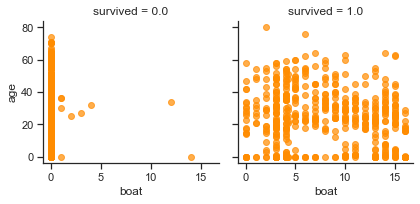

In [1133]:
#As shown,Individuals who had no rescue boat were the ones who died mostly,in addition to that,Age had no impact on their death: :
sb.set(style="ticks")
FGSrvBoat=sb.FacetGrid(Data,col="survived")
FGSrvBoat.map(plt.scatter,"boat","age",color='darkorange',alpha=.7)

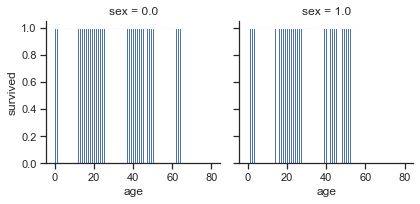

In [1134]:
#Plotting Age, Sex and Survival rate shows that mostly, female survivors > male survivors, with theirs average age up to +-65
#unlike male survivors who were all younger then +-50 years old
FGSexSrvAge=sb.FacetGrid(Data,col="sex")
FGSexSrvAge.map(plt.bar,"age","survived",alpha=1)

<h3>
    <font color=darkgreen>
            Analysing The Given Function :
    </font>
</h3>

None


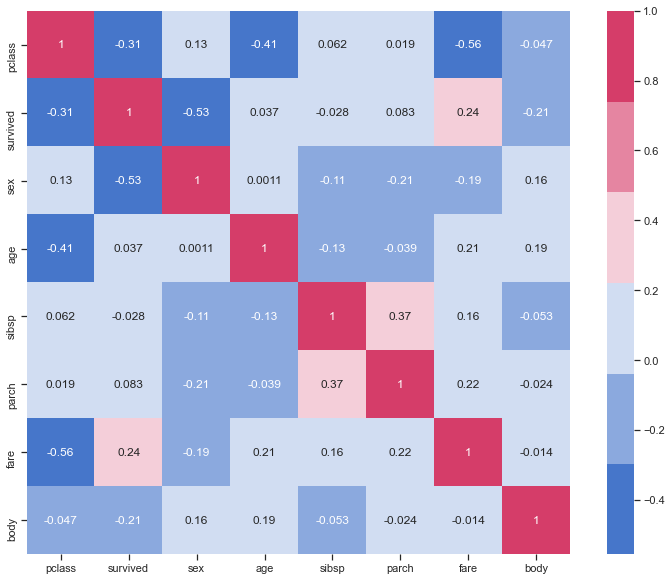

In [1135]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 13 , 10 ) )
    cmap = sb.diverging_palette( 255 , 0 , as_cmap = False )
    s = sb.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : 1 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
print(plot_correlation_map(Data))

<h4>
    <font color=80471C>
            Trying To have a better understanding of the most important Parameters in our Function :
    </font>
</h4>

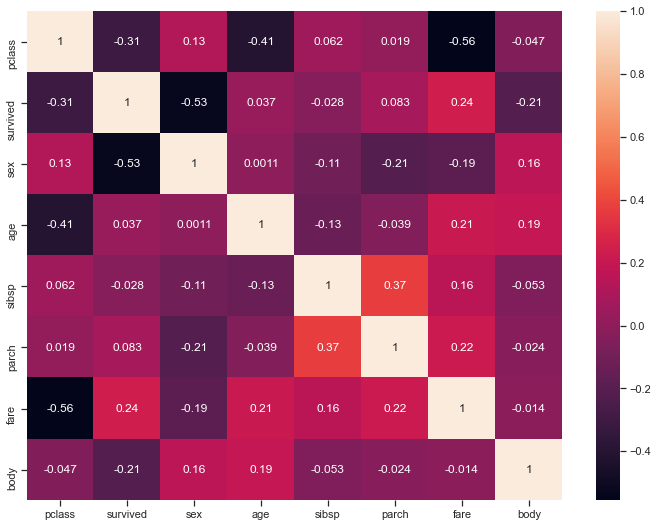

In [1136]:
#1st Exemple :
corr=Data.corr()
HeatMap = plt.subplots( figsize =( 12 , 9 ) )
HeatMap = sb.heatmap(corr, annot = True,cbar=True)

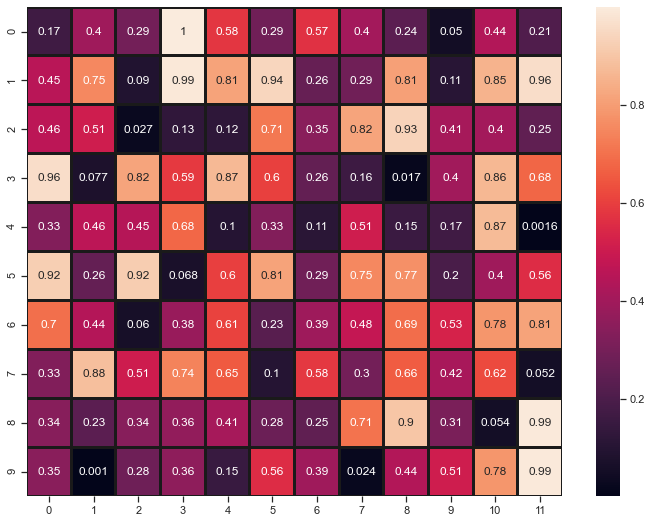

In [1137]:
#2nd Exemple :
Test = np.random.rand(10, 12)
HM = plt.subplots(figsize=(12,9))
HM = sb.heatmap(Test,linewidths=2,linecolor='k',annot=True)

##### - Data.corr() Alone returns a table of "judged" available correlations in our Data.
##### - plt.subplots() prepares the background template for our heatmap
##### - annot parameter in the creation of heatmaps gives a clearer view of the correlation intensity depending on its value
##### - plt.diverging_palette sets the desired colors spectrum, taking as parameters, lowest and highest colors  chrominance, and as_cmap true by default
##### - cmap a heatmap parameter designing the colors of its corresponding map, therefore could be plt.diverging_palette itself.
##### - cbar is a bool parameter that indicates wether we want the chrominance bar to be shown or not, on the right side
##### - linewidths and linecolor are parameters taken by the heatmap in order to seperate each cell, their respective names indicates their function.

<h3>
    <font color=darkgreen>
            Plotting the Pclasses and Survival rate together to have a clearer understanding of their relation :
    </font>
</h3>

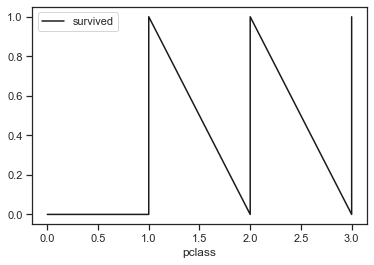

In [1138]:
Data.groupby(["pclass","survived"],squeeze=False).mean().reset_index()[["pclass","survived"]].plot("pclass","survived",color="k")

<h2>
    <font color=darkorange>
            Data Preprocessing :
    </font>
</h2>

<h3>
    <font color=darkgreen>
            Dropping Useless Columns :
    </font>
</h3>

In [1139]:
for i in Data[0:]:
    if i=="cabin" or i=="body" or i=="ticket" or i=="home.dest" or i=="embarked":
        Data.drop([i],axis=1,inplace=True)

<h3>
    <font color=darkgreen>
            Clearing The Names Data from Corrupted Features and Replacing Them With A Column Containing Titles :
    </font>
</h3>

In [1140]:
#Declaring the Str.split function :
Split=lambda Str:Str.split()
#Filling in the missing values presented in our Data["name"] column, So we could work with that for a while.
Data["name"].fillna(np.random.choice([str("Kenway, Mr. Edward"),str("Frye, Mrs. Evie")]),inplace=True)
#Getting out Data["name"] column Features in an ordered list so we would avoid repition :
for i in range(0,len(Data["name"])):
    if Data["name"][i] not in Names:
        Names.append(str(Data["name"][i]))
for i in range(len(Names),len(Data["name"])):
    Names.append(np.random.choice([str("Kenway, Mr. Edward"),str("Frye, Mrs. Evie")]))
#Manually fixing the last 1 dimentional feature in Data["name"] as it would be a waste to write a code for 1 exception :
Data["name"][1309]=np.random.choice([str("Kenway, Mr. Edward"),str("Frye, Mrs. Evie")])
#Getting rid of Data["name"] and replacing it with the 'more useful' Data["Title"]
Data.drop("name",axis=1,inplace=True)
Data.insert(2,"Title",Names,True)
#Replacing bad Features in order to have a complete functional Data Set :
for i in range(0,len(Data["Title"])):
    if len(Data["Title"][i])<=1:
        Data.replace(Data["Title"][i],np.random.choice(["Kenway, Mr. Edward","Frye, Mrs. Evie"]),inplace=True)
    else:
        Data.replace(Data["Title"][i],str(Data["Title"][i]),inplace=True)
        Words=Data["Title"][i].split(".")[0].split(" ")
        for j in Words:
            if j in Title_Dictionary.keys():
                k=Words.index(j)
                Data.replace(Data["Title"][i],Split(Data["Title"][i])[k],inplace=True)
#Adding slight changes in order to have a 100% Correct set of Data :
for i in range(0,len(Data["Title"])):
    if len(Data["Title"][i])>12:
        Data.replace(Data["Title"][i],np.random.choice(list(Title_Dictionary.keys())),inplace=True)
#Manually fixing the one and only Countess case in the Data :
Data.replace(Data["Title"][245],"the Countess",inplace=True)
#Now, DECORATION !
for i in range(0,len(Data["Title"])):
    Data["Title"][i]=Data["Title"][i].split(".")[0]
#Clearing The last row wich is the only one Containing np.NaN values in all columns :
Data["Title"][1309]=None
Data.dropna(axis=0,how='any',inplace=True)

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<h2>
    <font color=darkorange>
            Data Visualisation :
    </font>
</h2>

<h3>
    <font color=darkgreen>
            Visualising Titles according to their Respective Boats fares and survival Rate :
    </font>
</h3>

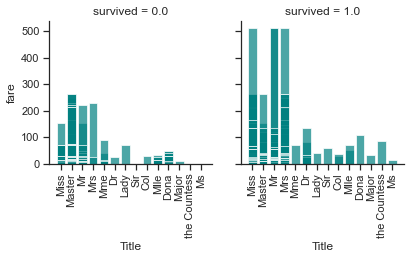

In [1141]:
FuckYouEya=sb.FacetGrid(Data,col="survived")
FuckYouEya.map(plt.bar,"Title","fare",color='teal',alpha=.7)
FuckYouEya.set_xticklabels(rotation=90)

<h4>
    <font color=White>
        <b>
            So far, we notice That, People having Boats are the ones who Survived mostly, Unlile most of those who didn't have one,
            in addition to that, The most important classes of Passengers had the highest Survival Rates. Wich might be explained by the fact that their titles allowed them to get rescue boats.
            and last but not least, We could also conclude that That these same classes paied extra Fares for their boats, wich makes sense.
        </b>
    </font>
</h4>

In [1142]:
Data

,pclass,survived,Title,sex,age,sibsp,parch,fare,boat
0,1.0,1.0,Miss,0.0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,Master,1.0,0.9167,1.0,2.0,151.5500,11
2,1.0,0.0,Miss,0.0,2.0000,1.0,2.0,151.5500,0
3,1.0,0.0,Mr,1.0,30.0000,1.0,2.0,151.5500,0
4,1.0,0.0,Mrs,0.0,25.0000,1.0,2.0,151.5500,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,Mr,0.0,14.5000,1.0,0.0,14.4542,0
1305,3.0,0.0,Mr,0.0,0.0000,1.0,0.0,14.4542,0
1306,3.0,0.0,Mr,1.0,26.5000,0.0,0.0,7.2250,0
1307,3.0,0.0,Mrs,1.0,27.0000,0.0,0.0,7.2250,0


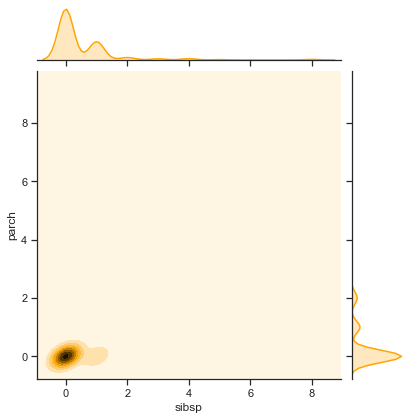

In [1170]:
sb.jointplot(x=Data["sibsp"], y=Data["parch"], kind="kde", color="orange");